In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
batch_size = 64

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
 
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(), #Conv2d(입력채널수, 출력채널수, 필터 크기)
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 192, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.MaxPool2d(2,2))
        
        #Dense layer 구축 
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256*3*3)
        x = self.classifier(x)
        return x

In [6]:
alexnet = AlexNet()
alexnet.to(device)

optimizer = optim.Adam(alexnet.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [7]:
loss_ =[]
 
n = len(trainloader) #배치 개수 
epochs = 10
 
for epoch in range(epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        
        outputs = alexnet(inputs) #예측값 산출 
        loss = criterion(outputs, labels) #손실 함수 계산 
        loss.backward() #손실 함수 기준으로 역전파 선언 
        optimizer.step() #가중치 최적화 
        running_loss += loss.item()
        
    loss_.append(running_loss / n)
    print('[%d] loss: %.3f' %(epoch +1, running_loss / len(trainloader)))

[1] loss: 1.562
[2] loss: 1.145
[3] loss: 0.938
[4] loss: 0.804
[5] loss: 0.703
[6] loss: 0.631
[7] loss: 0.567
[8] loss: 0.510
[9] loss: 0.455
[10] loss: 0.417


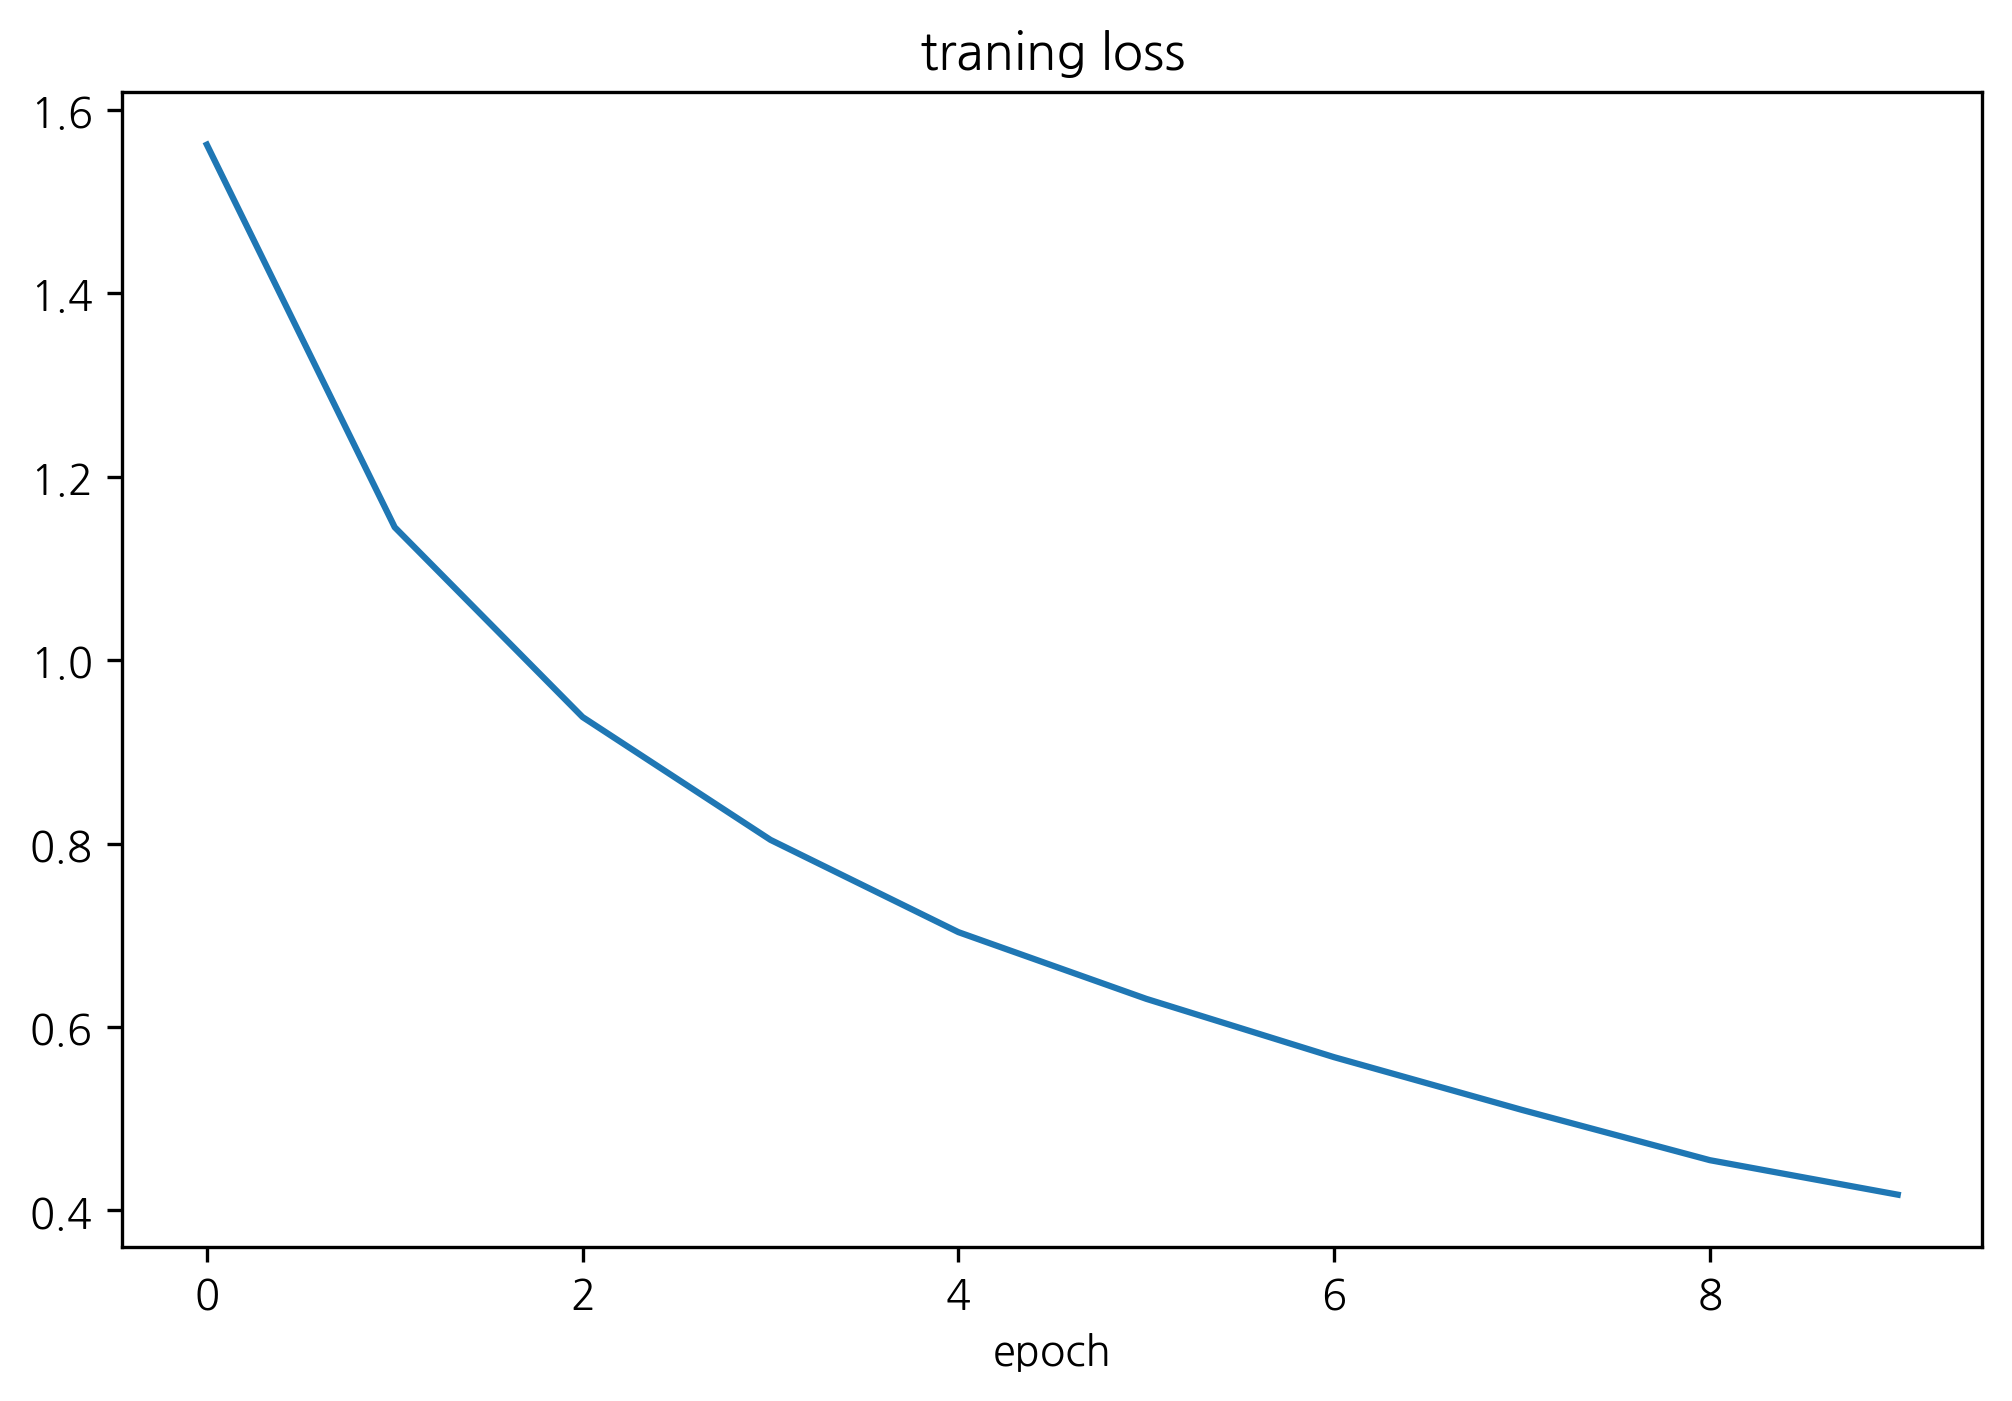

In [8]:
plt.plot(loss_)
plt.title("traning loss")
plt.xlabel("epoch")
plt.show()